In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Read .CSV Files

In [8]:
features=pd.read_csv('features.csv')
stores=pd.read_csv('stores.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [44]:
features.head()# Use Head Function to get top five rows from data set.

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [45]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [46]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [47]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [0]:
train.shape# Using Shape to get the number of rows and columns in dataset

(421570, 5)

In [0]:
test.shape

(115064, 4)

### Merge Train and Test data

In [9]:
train['data']='train'
test['data']='test'
test['Weekly_Sales']=np.nan
test=test[train.columns]
data=pd.concat([train,test],axis=0)

### Merging all dataset 

In [10]:
data=data.merge(features,how='left')
data=data.merge(stores,how='left')

In [11]:
train=test=features=None # Clearing space from memory

In [0]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,data,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,train,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,train,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,train,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,train,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,train,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [51]:
data.info()# Using info function to know null values,no.of columns,no.of rows,datatypes. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 17 columns):
Store           536634 non-null int64
Dept            536634 non-null int64
Date            536634 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       536634 non-null bool
data            536634 non-null object
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
CPI             498472 non-null float64
Unemployment    498472 non-null float64
Type            536634 non-null object
Size            536634 non-null int64
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 70.1+ MB


In [52]:
data.isnull().sum()/len(data)*100# using isnull() to know the percentage of null values.

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales    21.441802
IsHoliday        0.000000
data             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.507049
MarkDown2       63.162043
MarkDown3       54.843338
MarkDown4       55.809173
MarkDown5       50.339337
CPI              7.111365
Unemployment     7.111365
Type             0.000000
Size             0.000000
dtype: float64

### Null values implimentation
#### Fill Null values in Markdown with 0 as no promotions were running during that period.

In [12]:
# Replaceing Negative Value in MarkDown with 0 
data['MarkDown1']=data['MarkDown1'].apply(lambda x:0 if x<0 else x)
data['MarkDown2']=data['MarkDown2'].apply(lambda x:0 if x<0 else x)
data['MarkDown3']=data['MarkDown3'].apply(lambda x:0 if x<0 else x)
data['MarkDown4']=data['MarkDown4'].apply(lambda x:0 if x<0 else x)
data['MarkDown5']=data['MarkDown5'].apply(lambda x:0 if x<0 else x)

In [13]:
data['MarkDown1'].fillna(0,inplace=True)
data['MarkDown2'].fillna(0,inplace=True)
data['MarkDown3'].fillna(0,inplace=True)
data['MarkDown4'].fillna(0,inplace=True)
data['MarkDown5'].fillna(0,inplace=True)

In [14]:
# Change Datatype of Date Column to Datetime
data['Date']=pd.to_datetime(data['Date'])

### Extract Year,Month,Date,Week from Date 

In [15]:
data['Year']=data.Date.dt.year
data['Month']=data.Date.dt.month
data['Week']=data.Date.dt.week
data['Day']=data.Date.dt.day

In [11]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,data,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,train,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,train,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,train,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,train,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,train,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9,5


### Fill Null values in CPI and Unemployment 

In [0]:
data.groupby(['Year','Month','Store'])['CPI','Unemployment'].mean().reset_index().head()

,Year,Month,Store,CPI,Unemployment
0,2010,2,1,211.236524,8.106
1,2010,2,2,210.892912,8.324
2,2010,2,3,214.566108,7.368
3,2010,2,4,126.504332,8.623
4,2010,2,5,211.796322,6.566


In [2]:
# We can observe that as the year increases CPI increase and Unemployment Decreases but there
# is no gradual increase or decrease .Hence Using values from april,2013 to fill null values 
# As values are missing for three months i.e May,June,July,2013

In [16]:
data.CPI.fillna(data.Store.map(data.groupby('Store')['CPI'].max()),inplace=True)

In [17]:
data.Unemployment.fillna(data.Store.map(data.groupby('Store').Unemployment.min()),inplace=True)

In [0]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,data,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,train,42.31,2.572,0.0,0.0,...,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,train,38.51,2.548,0.0,0.0,...,0.0,0.0,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,train,39.93,2.514,0.0,0.0,...,0.0,0.0,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,train,46.63,2.561,0.0,0.0,...,0.0,0.0,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,train,46.50,2.625,0.0,0.0,...,0.0,0.0,211.350143,8.106,A,151315,2010,3,9,5


In [14]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    115064
IsHoliday            0
data                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

### Split Train & Test Data

In [18]:
train=data.loc[data.data=='train']
test=data.loc[data.data=='test']

In [19]:
train.drop(['data'],axis=1,inplace=True)
test.drop(['data','Weekly_Sales'],axis=1,inplace=True)

In [20]:
data=None

## Data Exploration

In [0]:
train.Weekly_Sales.describe()
# Using describe() to get descriptive statistics about the Target Variable

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [21]:
# Replacing Negative Values in Target Variable with 0
train.Weekly_Sales=train.Weekly_Sales.apply(lambda x:0 if x<0 else x)

In [0]:
train.Weekly_Sales.describe()

count    421570.000000
mean      15981.467250
std       22711.032446
min           0.000000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

### Univariate Analysis

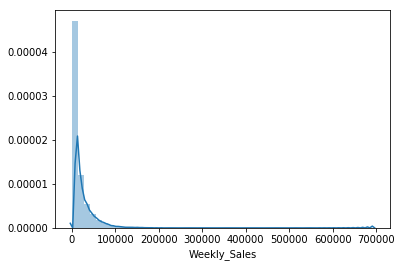

In [0]:
# Distribution of Target variable to know the symmetry of data
sns.distplot(train.Weekly_Sales)

In [0]:
print('Skewness is: ',train.Weekly_Sales.skew())
print('Kurtosis is: ',train.Weekly_Sales.kurt())

Skewness is:  3.26206010752399
Kurtosis is:  21.49180743765208


In [1]:
# 1. Target Variable is right Skewed.
# 2. Mean>Median
# 3. Skewness is greater than 0
# 4. Lepto Kurtic Curve - Hence highly densed towards left.

In [0]:
# Analysis of Store Data
stores.groupby('Type').Size.mean()

Type
A    177247.727273
B    101190.705882
C     40541.666667
Name: Size, dtype: float64

In [2]:
#We can say that 
# 1. Type A represents Big Stores
# 2. Type B represents Medium Stores
# 3. Type C represents Small Stores

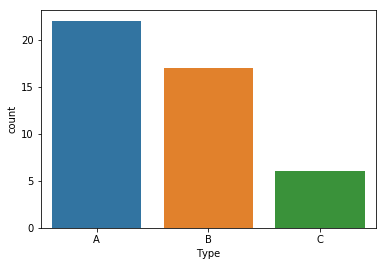

In [0]:
sns.countplot(stores.Type)# Count plot get the count of classes in Type Columns

In [3]:
# 1. Majority of stores are Type A 

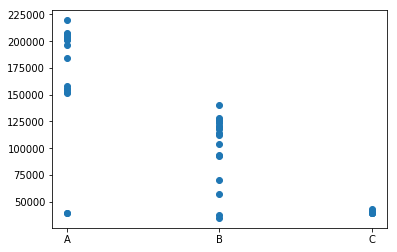

In [0]:
plt.scatter(stores.Type,stores.Size)

In [ ]:
# 1. There are few stores in Type A & B with size less than 40000

In [0]:
stores[(stores.Size<40000)&(stores.Type!='C')]

,Store,Type,Size
2,3,B,37392
4,5,B,34875
32,33,A,39690
35,36,A,39910


In [0]:
train.groupby('Type').Weekly_Sales.mean().reset_index()
# Average Weekly Sales of Different Types of Stores.

,Type,Weekly_Sales
0,A,20099.766466
1,B,12237.326208
2,C,9519.638045


In [0]:
temp=train[train.Store.isin([3,5,33,36])]
temp.groupby('Store').Weekly_Sales.mean().reset_index()

,Store,Weekly_Sales
0,3,6373.165767
1,5,5053.463686
2,33,5728.429998
3,36,8584.595484


In [0]:
# 1. Average Weekly Sales of Store Number 3,5,33,36 are in range of Average Weekly Sales of Type C
# 2. We can say that Store number 3,5,33,36 belong to type C.
# 3. So replace their type to C.

In [22]:
train['Type'].loc[train.Store.isin([3,5,33,36])]='C'
test['Type'].loc[test.Store.isin([3,5,33,36])]='C'

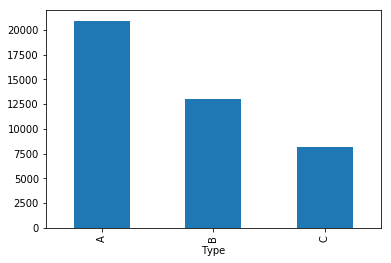

In [0]:
# Bar Plot to get idea of average Weekly Sales of Type of Stores.
train.groupby('Type').Weekly_Sales.mean().plot(kind="bar")

### Distribution of continuous Independent Variables

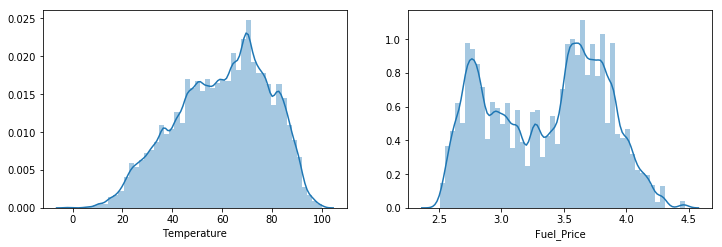

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.distplot(train.Temperature)
plt.subplot(222)
sns.distplot(train.Fuel_Price)
plt.show()

In [4]:
# 1. Temperature is slightly left skewed.
# 2. Mostly Temperature of Stores are between 50 to 100 ,So Stores are from 
#    Continental Climate Region.
# 3. Fuel Price is Bi Model in Nature.

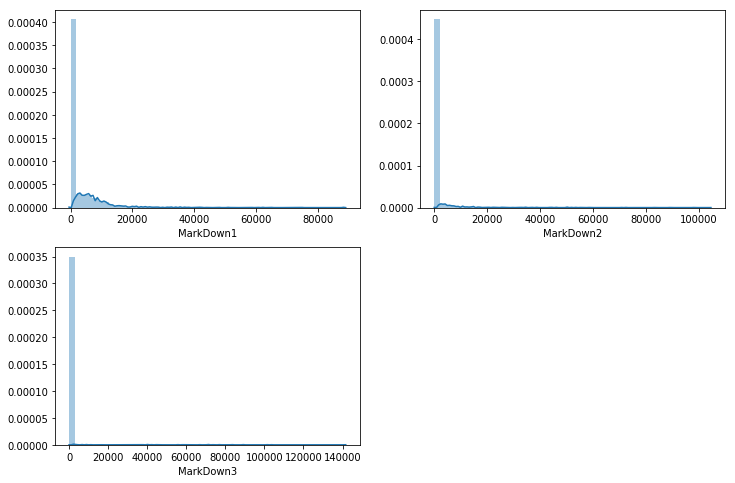

In [0]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.distplot(train.MarkDown1)
plt.subplot(222)
sns.distplot(train.MarkDown2)
plt.subplot(223)
sns.distplot(train.MarkDown3)
plt.show()

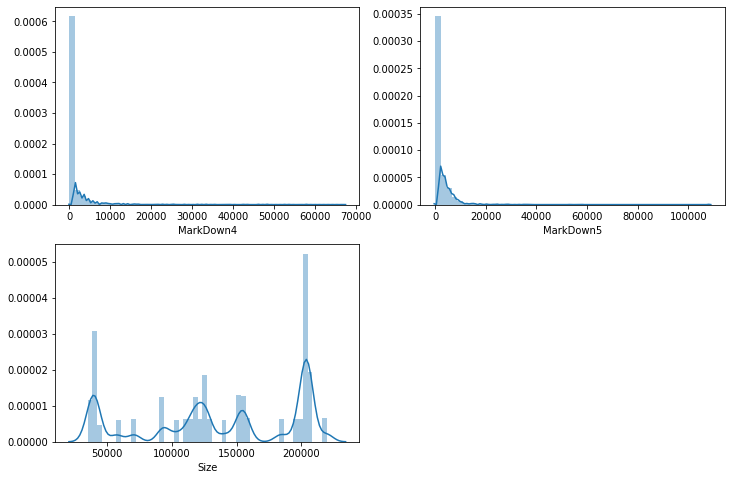

In [104]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.distplot(train.MarkDown4)
plt.subplot(222)
sns.distplot(train.MarkDown5)
plt.subplot(223)
sns.distplot(train.Size)
plt.show()
plt.show()

In [ ]:
# 1. Distribution of Markdown is highly right skewed in nature.
# 2. Most of the Weeks ,Stores doesn't run Promotions,hence markdown are 0.
# 3. Size of Stores are Multi Model in nature.

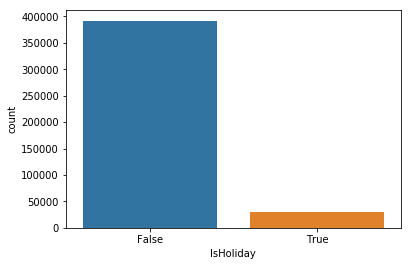

In [0]:
sns.countplot(train.IsHoliday)

In [5]:
# There are very few Holidays

### Bivariate Analysis
##### Analysis of Target Variables And Independent Variables.

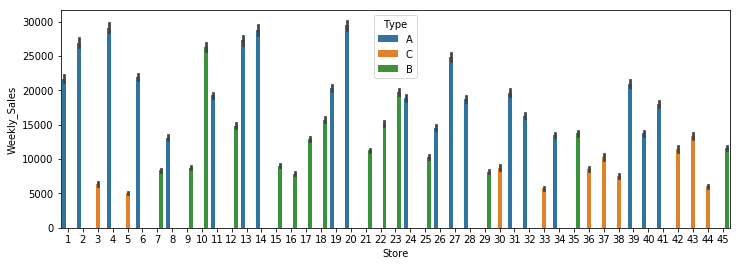

In [0]:
# Store Number
plt.figure(figsize=(12,4))
sns.barplot(y='Weekly_Sales',x='Store',data=train,hue='Type')

In [6]:
# 1. Type A Stores have high Average Weekly Sale.
# 2. Store 10,14 and 20 have highest average sale.

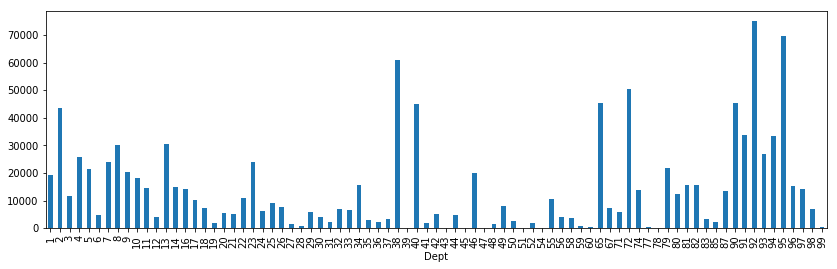

In [0]:
# Department Number
plt.figure(figsize=(14,4))
train.groupby('Dept').Weekly_Sales.mean().plot(kind='bar')

In [7]:
# 1. Department No. 38,92 and 95 have highest average sales.
# 2. These deparments can have items which are bought frequently.

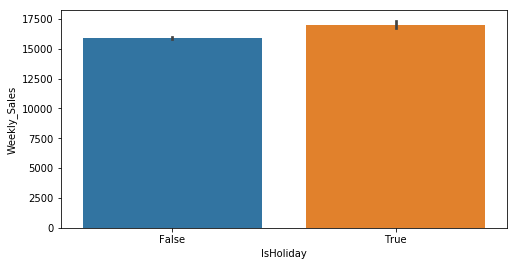

In [0]:
# IS Holiday
plt.figure(figsize=(8,4))
sns.barplot(y='Weekly_Sales',x='IsHoliday',data=train)

In [8]:
# 1. Average Sales during Holiday Week is higher than Normal day Week.

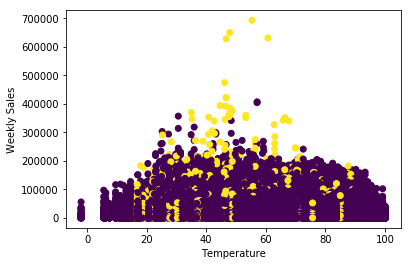

In [41]:
# Temperature VS Weekly Sales
plt.scatter(train.Temperature,train.Weekly_Sales,c=train.IsHoliday)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
# 1. Weekly Sales increases if Temperature Between 30-70 .
# 2. Yellow dots are holiday weeks.

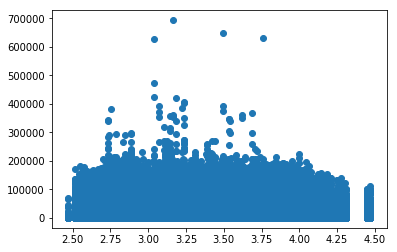

In [0]:
# Fuel_Price VS Weekly_Sales
plt.scatter(train.Fuel_Price,train.Weekly_Sales)
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
# 1. There is no much effect of fuel price on weekly sales.

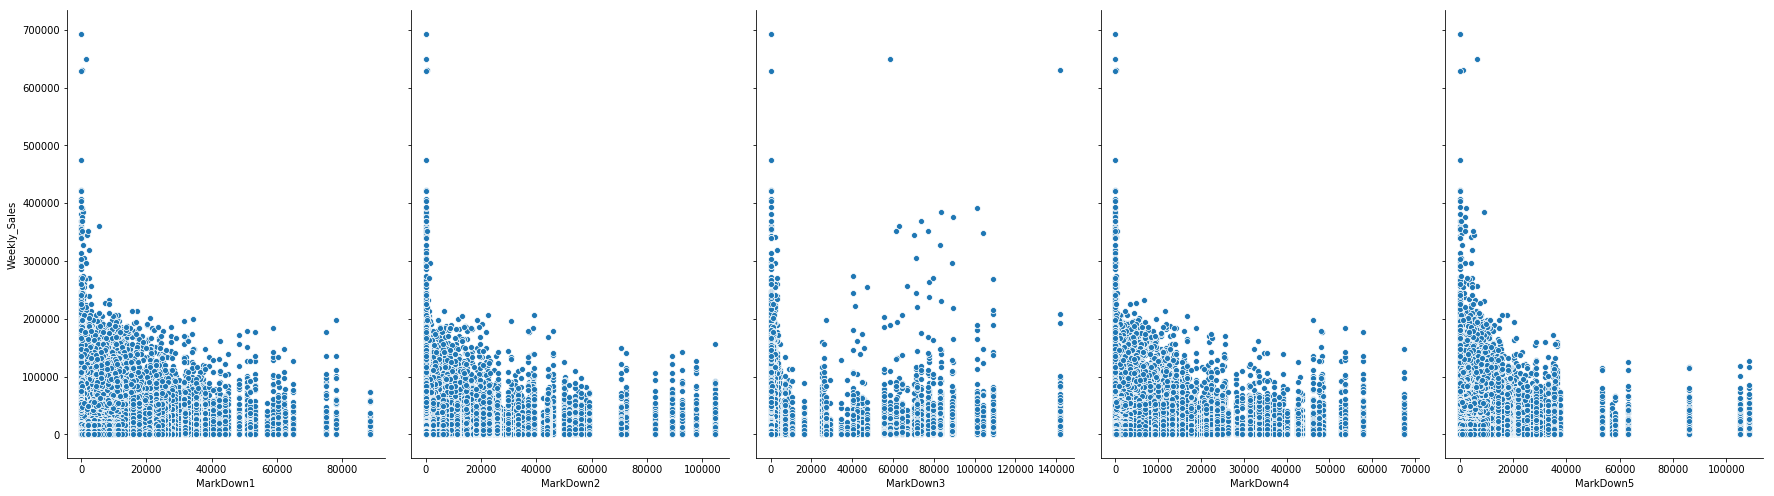

In [0]:
# Pair Plot for MarkDown VS Weekly_Sales
sns.pairplot(train,x_vars=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],
            y_vars='Weekly_Sales',height=7,aspect=0.7,kind='scatter')
plt.show()

In [ ]:
# 1. In MarkDown 1,2,4,5 we can see that Weekly Sales are more when MarkDown<40000.
# 2. In MarkDown 3 We can see a linear relation as MarkDown Increase Weekly Sales increases.

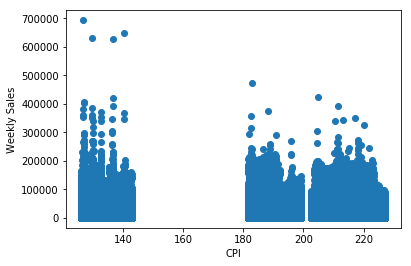

In [38]:
# CPI VS Weekly_Sales
plt.scatter(train.CPI,train.Weekly_Sales)
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
# 1. We can see that there are two sets of Stores.
# 2. Stores with CPI<150 and Stores with CPI>180
# 3. So we can assume that Stores are from different regions.
# 3. Weekly_Sales is more if CPI is less.

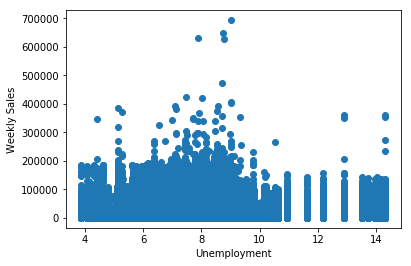

In [39]:
# Unemployment VS Weekly_Sales
plt.scatter(train.Unemployment,train.Weekly_Sales)
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
# 1. We can see that Weekly Sales is more when Unemployment is less.

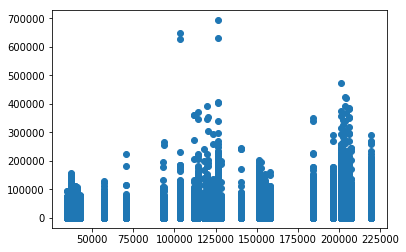

In [0]:
# Size of Stores VS Weekly_Sales
plt.scatter(train.Size,train.Weekly_Sales)
plt.xlabel('Size')
plt.ylabel('Weekly Sales')
plt.show

In [ ]:
# 1. We can observe that as the size od stores increase Weekly_Sales also increases.
# 2. Stores between Size of 110000-130000 and 200000-210000 have higher Weekly_Sales.

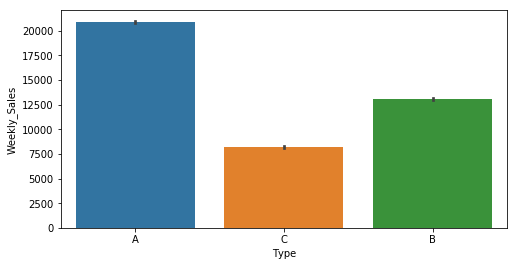

In [0]:
# Type of Stores VS Average Weekly_Sales 
plt.figure(figsize=(8,4))
sns.barplot(y='Weekly_Sales',x='Type',data=train)

In [ ]:
# 1. Type A has Highest Average Weekly Sales.

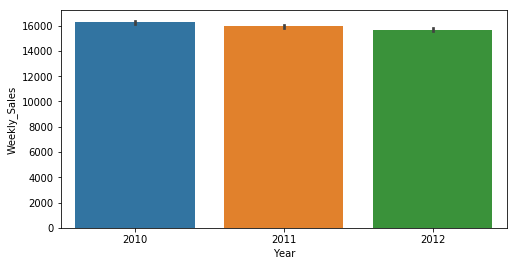

In [0]:
# Year VS Average Weekly_Sales
plt.figure(figsize=(8,4))
sns.barplot(y='Weekly_Sales',x='Year',data=train)

In [ ]:
# Average Weekly Sales is some how constant over the years.

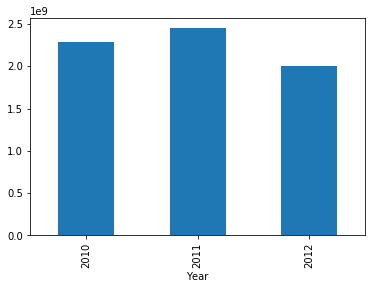

In [0]:
# Year VS Total Weekly_Sales
train.groupby('Year').Weekly_Sales.sum().plot(kind='bar')

In [ ]:
# 1. 2011 is the year with highest total sale.

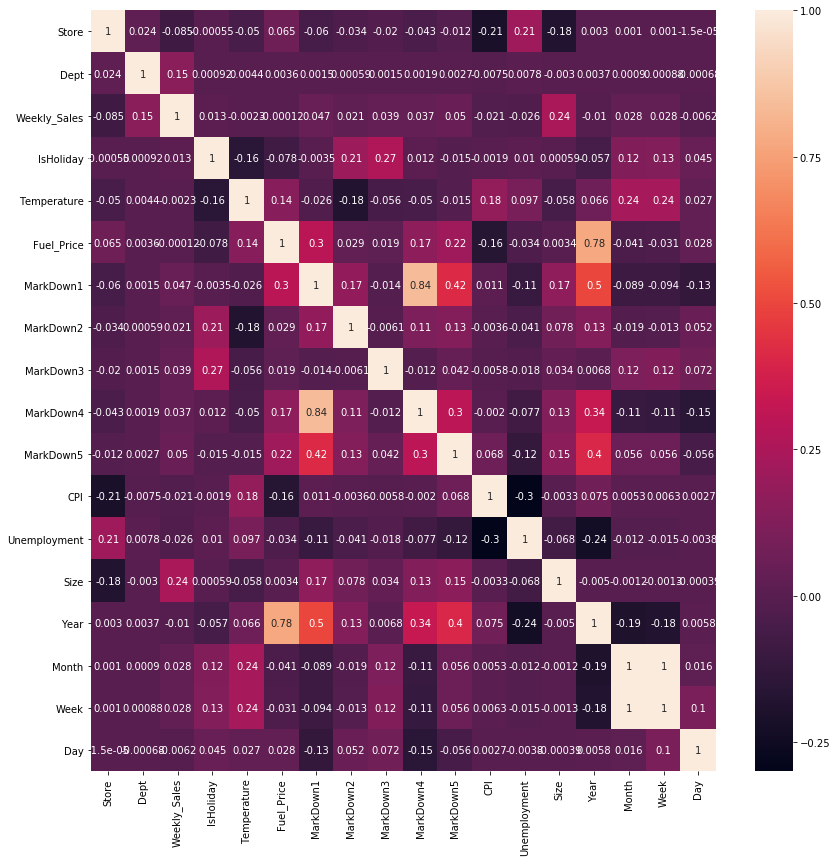

In [0]:
# Correlation matrix to know if there is any correlation between independent variables and 
# dependent variables Also to know if there is multicolinarity in the dataset i.e is there 
# correlation between independent variables.
plt.figure(figsize=(14,14))
sns.heatmap(train.corr(),annot=True)

In [ ]:
# 1. Weekly Sales have highest correlation with Size , as the Size of Store Increase 
#    Weekly Sales increases.
# 2. As Year increase price of Fuel also increase.
# 3. Unemployment and CPI are negatively correlated as the Unemployment decreases,CPI increses.
# 4. Year is correlated with MarkDown 1,4,5 and Unemployment is decreasing over the years.
# 5. MarkDown 4 & 5 are correlated to MarkDown 1.

### Feature Transformation
#### Normalizing continuous variables

In [0]:
norm_train=train.drop(['Store','Dept','Date','Weekly_Sales','IsHoliday','Type','Year','Day','Month','Week'],axis=1)
norm_test=test.drop(['Store','Dept','Date','IsHoliday','Type','Year','Day','Month','Week'],axis=1)
norm_train=(norm_train-norm_train.mean())/norm_train.std()
norm_test=(norm_test-norm_test.mean())/norm_test.std()
train=train[['Store','Dept','Weekly_Sales','IsHoliday','Type','Year','Day','Month','Week']]
test=test[['Store','Dept','IsHoliday','Type','Year','Day','Month','Week']]
train=pd.concat([train,norm_train],axis=1)
test=pd.concat([test,norm_test],axis=1)

In [0]:
# Changing Labels for IsHoliday : True:1 and False:0
train.IsHoliday=train.IsHoliday.apply(lambda x:1 if x==True else 0)
test.IsHoliday=test.IsHoliday.apply(lambda x:1 if x==True else 0)

In [0]:
# Getting Dummy Variables for Type Column : Type_A,Type_B,Type_c
train=pd.get_dummies(train,columns=['Type'])
test=pd.get_dummies(test,columns=['Type'])

In [0]:
# Splitting train set into dependent variable and independent vraiables.
x=train.drop('Weekly_Sales',axis=1) # Independent Varaiables
y=train.Weekly_Sales # Dependent Vraiable

In [0]:
# Using Standard Scaler to scale data under one scale.
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()
scaled_x=sc.fit_transform(x)# First,fit_transoform train data to set scale.
scaled_x=pd.DataFrame(scaled_x,columns=x.columns)
scaled_test=sc.transform(test)# then applied that scale to test data as well.
scaled_test=pd.DataFrame(scaled_test,columns=test.columns)

In [0]:
# Using Train_Test_Split to divide the train data in train and validaion set.
from sklearn.model_selection import train_test_split

In [0]:
# Using Validation set size of 30% and Random_state=10
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.3,random_state=10)

In [0]:
# Importing Libraries for Machine Learning Algorithm.
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,RandomForestRegressor,VotingRegressor
from lightgbm import LGBMRegressor

In [0]:
# Using Mean Squared Error and RMSE as evalutaion metrics for different models.
from sklearn.metrics import mean_squared_error

In [0]:
#Linear Regression
lr_model = LinearRegression()

In [0]:
#  Fully grown decision Tree
dt_model = DecisionTreeRegressor(random_state=10)

In [0]:
# Boostrap Sampled Random Forest : with the hope of controlling the bias errors and variance errors
rf_model= RandomForestRegressor(n_estimators=20,random_state=10 )

In [0]:
bg_model = BaggingRegressor(base_estimator=rf_model,n_estimators=20,random_state=10)
adb_model= AdaBoostRegressor(base_estimator=dt_model,n_estimators=20 ,random_state=10)
lgbm_model=LGBMRegressor()
vr_model=VotingRegressor(estimators=[('LR',lr_model),('tree',dt_model),('RF',rf_model),
                                     ('Bagg',bg_model),('ADB',adb_model),('LGBM',lgbm_model)])

In [0]:
models = []
models.append(('Linear', lr_model))
models.append(('DecisionTree', dt_model))
models.append(('RandomForest', rf_model))
models.append(('Bagging', bg_model))
models.append(('ADA Boost', adb_model))
models.append(('LGBM', lgbm_model))
models.append(('Voting', vr_model))

In [0]:
for name,model in models :
    model.fit(xtrain,ytrain)
    pred_test=model.predict(xtest)
    pred_train=model.predict(xtrain)
    msg1 = "(%s) ----  %s: %f"% ('RMSE Test', name, np.sqrt(mean_squared_error(ytest,pred_test)))
    msg2 = "(%s) ----  %s: %f"% ('RMSE Train', name, np.sqrt(mean_squared_error(ytrain,pred_train)))
    print(msg1)
    print(msg2)
    print('\n\n\n')

(RMSE Test) ----  Linear: 21661.664670
(RMSE Train) ----  Linear: 21684.795614




(RMSE Test) ----  DecisionTree: 5206.230782
(RMSE Train) ----  DecisionTree: 0.000000




(RMSE Test) ----  RandomForest: 3773.806650
(RMSE Train) ----  RandomForest: 1407.285298




(RMSE Test) ----  Bagging: 3756.495536
(RMSE Train) ----  Bagging: 2191.249887




(RMSE Test) ----  ADA Boost: 3804.013451
(RMSE Train) ----  ADA Boost: 111.377759




(RMSE Test) ----  LGBM: 6783.240424
(RMSE Train) ----  LGBM: 6624.598974






In [ ]:
# Best Model : Bagging Regressor with Random Forest as base model 
# To reduce bias error in Random Forest and then reduce variance error through bagging.

### Getting P value using OLS method

In [0]:
import statsmodels.api as sm

In [0]:
lrml=sm.OLS(y,sm.add_constant(scaled_x))

In [56]:
lrml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2166.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:37:35   Log-Likelihood:            -4.8071e+06
No. Observations:              421570   AIC:                         9.614e+06
Df Residuals:                  421550   BIC:                         9.615e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.599e+04     45.093    354.685      0.000    1.59e+04    1.61e+04
Store        -1381.2560     39.599    -34.881      0.000   -1458.868   -1303.644
Dept          3381.2830     33.441    101.111      0.000    3315.739    3446.827
IsHoliday       66.5670     37.616      1.770      0.077      -7.158     140.292
Year          -588.1550    126.602     -4.646      0.000    -836.291    -340.020
Day           -156.5744    582.859     -0.269      0.788   -1298.961     985.812
Month          265.6660   6558.631      0.041      0.968   -1.26e+04    1.31e+04
Week           207.1099   6573.301      0.032      0.975   -1.27e+04    1.31e+04
Temperature    -23.2106     41.577     -0.558      0.577    -104.700      58.279
Fuel_Price     208.7669     70.524      2.960      0.003      70.543     346.991
MarkDown1      245.1901     71.024      3.452      0.001     105.984     384.396
MarkDown2      -14.7326     36.079     -0.408      0.683     -85.447      55.982
MarkDown3      588.1837     35.172     16.723      0.000     519.247     657.121
MarkDown4      -13.2012     63.206     -0.209      0.835    -137.082     110.680
MarkDown5      407.3062     39.459     10.322      0.000     329.967     484.645
CPI           -965.3765     39.554    -24.407      0.000   -1042.901    -887.852
Unemployment  -394.7325     38.334    -10.297      0.000    -469.865    -319.600
Size          7445.7381    106.604     69.845      0.000    7236.798    7654.679
Type_A       -2.037e+15   4.96e+15     -0.410      0.682   -1.18e+16    7.69e+15
Type_B       -1.938e+15   4.72e+15     -0.410      0.682   -1.12e+16    7.32e+15
Type_C       -1.546e+15   3.77e+15     -0.410      0.682   -8.93e+15    5.84e+15
==============================================================================
Omnibus:                   295107.947   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8699906.080
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      24.429   Cond. No.                     4.13e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.69e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Using Backword Selection
#### 1. Find out that feature which has the Max P value that is greater than 0.05 and drop them
#### 2. keep doing it till get a feature with low P value

In [93]:
lrml=sm.OLS(y,sm.add_constant(scaled_x.drop(['Week','Month','MarkDown4','Day','MarkDown2','Type_A'],axis=1))).fit()
lrml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2926.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:20:52   Log-Likelihood:            -4.8072e+06
No. Observations:              421570   AIC:                         9.615e+06
Df Residuals:                  421555   BIC:                         9.615e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.598e+04     33.394    478.571      0.000    1.59e+04     1.6e+04
Store        -1367.9041     36.584    -37.391      0.000   -1439.608   -1296.201
Dept          3382.5513     33.412    101.237      0.000    3317.064    3448.038
IsHoliday      126.7918     35.180      3.604      0.000      57.839     195.744
Year          -885.5819     68.923    -12.849      0.000   -1020.670    -750.494
Temperature    112.2034     37.371      3.002      0.003      38.958     185.449
Fuel_Price     370.9764     61.392      6.043      0.000     250.650     491.303
MarkDown1      267.5352     41.557      6.438      0.000     186.084     348.986
MarkDown3      619.7672     34.791     17.814      0.000     551.578     687.956
MarkDown5      507.6434     38.648     13.135      0.000     431.895     583.392
CPI           -957.9230     39.313    -24.367      0.000   -1034.975    -880.872
Unemployment  -462.1027     37.593    -12.292      0.000    -535.784    -388.422
Size          7339.0273    105.224     69.747      0.000    7132.792    7545.263
Type_B         858.1627     75.492     11.368      0.000     710.200    1006.125
Type_C        2654.7251    106.963     24.819      0.000    2445.081    2864.370
==============================================================================
Omnibus:                   295336.449   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8721379.836
Skew:                           3.007   Prob(JB):                         0.00
Kurtosis:                      24.456   Cond. No.                         7.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Statistical Test
#### Ho:m1==m2
#### H1:m1!=m2
#### Our Null Hypothesis is that the independent variables are insignificant.

In [0]:
import scipy.stats

In [63]:
scipy.stats.ttest_ind(scaled_x.Day,train.Weekly_Sales)

Ttest_indResult(statistic=-456.8931215748433, pvalue=0.0)

In [64]:
scipy.stats.ttest_ind(scaled_x.Week,train.Weekly_Sales)

Ttest_indResult(statistic=-456.8931215748433, pvalue=0.0)

In [65]:
scipy.stats.ttest_ind(scaled_x.Temperature,train.Weekly_Sales)

Ttest_indResult(statistic=-456.8931215748433, pvalue=0.0)

In [69]:
scipy.stats.ttest_ind(scaled_x.Year,train.Weekly_Sales)

Ttest_indResult(statistic=-456.8931215748433, pvalue=0.0)

In [0]:
type_a=train[train.Type_A==1]['Weekly_Sales']
type_b=train[train.Type_B==1]['Weekly_Sales']
type_c=train[train.Type_C==1]['Weekly_Sales']

In [78]:
scipy.stats.f_oneway(type_a,type_b,type_c)

F_onewayResult(statistic=10866.817951833642, pvalue=0.0)

In [0]:
yes_holiday=train[train.IsHoliday==1]['Weekly_Sales']
no_holiday=train[train.IsHoliday==0]['Weekly_Sales']

In [82]:
scipy.stats.ttest_ind(yes_holiday,no_holiday,equal_var=True)

Ttest_indResult(statistic=8.295284324945747, pvalue=1.0863917608407316e-16)

In [0]:
# By performing some statistical test on independent variables as Pvalue is less than 0.05
# We can say that these vairables are significant.

### Feature Elimination Using Random Forest Feature Importance

In [0]:
rf_model.fit(xtrain,ytrain)
pred_test=rf_model.predict(xtest)
pred_train=rf_model.predict(xtrain)
msg1 = "(%s) ----  : %f"% ('RMSE Test',  np.sqrt(mean_squared_error(ytest,pred_test)))
msg2 = "(%s) ----  : %f"% ('RMSE Train',  np.sqrt(mean_squared_error(ytrain,pred_train)))
print(msg1)
print(msg2)

(RMSE Test) ----  : 3809.742120
(RMSE Train) ----  : 1406.963911


In [0]:
df=pd.DataFrame(rf_model.feature_importances_,index=x.columns,columns=['feature_importance'])

In [0]:
df.sort_values(by='feature_importance',ascending=False,inplace=True)

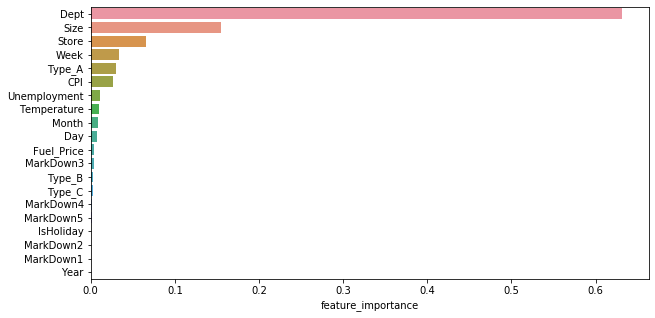

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(df.feature_importance,df.index)

In [0]:
newtrain=scaled_x.drop(['Year','MarkDown1','MarkDown4','MarkDown5','MarkDown2','IsHoliday','Type_B','Type_C'],axis=1)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(newtrain,y,test_size=0.3,random_state=10)

In [105]:
rf_model.fit(x_train,y_train)
pred_test=rf_model.predict(x_test)
pred_train=rf_model.predict(x_train)
msg1 = "(%s) ----  : %f"% ('RMSE Test',  np.sqrt(mean_squared_error(y_test,pred_test)))
msg2 = "(%s) ----  : %f"% ('RMSE Train',  np.sqrt(mean_squared_error(y_train,pred_train)))
print(msg1)
print(msg2)

(RMSE Test) ----  : 3747.159290
(RMSE Train) ----  : 1402.289185


In [106]:
bg_model.fit(x_train,y_train)
pred_test=bg_model.predict(x_test)
pred_train=bg_model.predict(x_train)
msg1 = "(%s) ----  : %f"% ('RMSE Test',  np.sqrt(mean_squared_error(y_test,pred_test)))
msg2 = "(%s) ----  : %f"% ('RMSE Train',  np.sqrt(mean_squared_error(y_train,pred_train)))
print(msg1)
print(msg2)

(RMSE Test) ----  : 3713.441960
(RMSE Train) ----  : 2176.804402


In [ ]:
# Using important features in Random Forrest and then Bagging ,reduce RMSE a bit.
# Finaly using this model to predict Weekly_Sales in Test data.

In [0]:
pred=bg_model.predict(scaled_test)# Using Scaled test data

In [0]:
test1=pd.read_csv('/content/test.csv')

In [0]:
test1['Weekly_Sales']=pred

In [0]:
solution=test1[['Store','Dept','Date','Weekly_Sales']]

In [0]:
solution.to_csv('solution.csv',index_label=False)